In [1]:
import pandas as pd
import pprint

In [2]:
lyrics = pd.read_csv('../genius_lyricsglobal.csv')

Phrase Frequency

In [3]:
docs = lyrics['lyrics'].tolist() #list of Unicode strings

In [4]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

#Removing stopwords:
from sklearn.feature_extraction import text
sw = ['oh','ooh','yeah','na','la','hey','like','da', 'feat',
      'whoa','uh','huh','doh','doo','ha','eh','ay','ayy','ll','re','ve','ft', 'yo',
     'mmm','nah','ah','woah'] #removing sounds, contractions and featured artists
stop_words= text.ENGLISH_STOP_WORDS.union(sw)

docs = [[token for token in doc if token not in stop_words] for doc in docs]

In [5]:
import nltk

In [6]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
docsnb = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs] #so i can do song repetitiveness

In [10]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [11]:
bgs = pd.Series([x for x in [item for sublist in docs for item in sublist] if '_' in x])
bgs = pd.DataFrame(bgs.value_counts()).reset_index().rename(columns={'index':'phrase',0:'count'})
# bgs['phrase'] = bgs['phrase'].str.replace('_',' ')
bgs = bgs.sort_values('count', ascending=False).head(100)['phrase']

In [12]:
cloudtext = ' '.join(bgs)

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

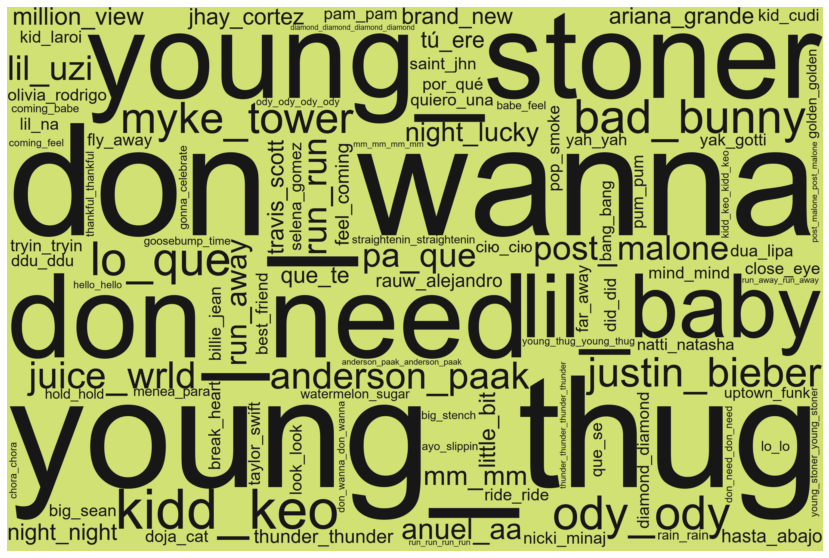

In [15]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0, 0%, 9%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\Arial.ttf', background_color="#d2e174", width=3000, height=2000,relative_scaling=1).generate(cloudtext)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

plt.savefig('global_wc.png')
